In [1]:
import os
os.environ["MUJOCO_GL"] = "egl"

In [2]:
import mujoco._simulation_pool
import mujoco.gl_context
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [3]:
model = mujoco.MjModel.from_xml_path("models/rodent.xml")

In [4]:
nroll = 256
res = 64

In [5]:
model.vis.global_.offheight = res*nroll
model.vis.global_.offwidth = res

In [6]:
sm = mujoco._simulation_pool.SimulationPool(model, nroll, 20, mujoco.mjtState.mjSTATE_FULLPHYSICS)

In [7]:
sm.reset(np.ones(nroll, bool))
np.array(sm.getState())
sm.step()
sm.step()
sm.step()

In [8]:
glContext = mujoco.gl_context.GLContext(res*nroll, res)
opt = mujoco.MjvOption()
opt.flags[mujoco.mjtVisFlag.mjVIS_JOINT] = False
opt.flags[mujoco.mjtVisFlag.mjVIS_SKIN] = False
opt.flags[mujoco.mjtVisFlag.mjVIS_FLEXSKIN] = False
opt.flags[mujoco.mjtVisFlag.mjVIS_TEXTURE] = True
sm.enableRendering(glContext, res, res, opt)
sm.setSceneFlag(mujoco.mjtRndFlag.mjRND_FOG, True)
sm.setSceneFlag(mujoco.mjtRndFlag.mjRND_SHADOW, False)
sm.setSceneFlag(mujoco.mjtRndFlag.mjRND_REFLECTION, False)

In [9]:
frame = np.full((res*nroll, res, 3), res, np.uint8)

In [10]:
for t in tqdm.trange(100):
    sm.renderAll(frame, "side")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.20it/s]


In [88]:
nroll*13.77

3525.12

# NOTE: SHOULD DOUBLE-CHECK THAT ENV ORDER IS CORRECT FOR THE RENDERED
OpenGL has the origin at the bottom

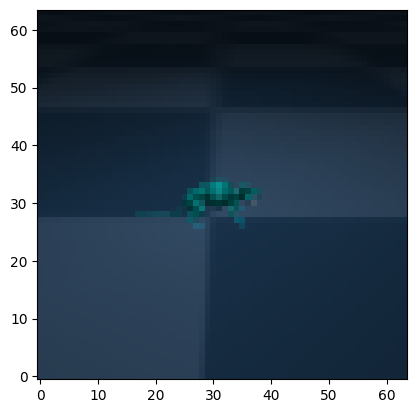

In [11]:
plt.imshow(frame.reshape(nroll, res, res, 3)[0], origin="lower")

In [77]:
for t in tqdm.trange(100):
    sm.multistep(10)

100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 29.18it/s]


In [78]:
10*nroll*29.18

74700.8

In [27]:
np.array(sm.getState())

array([[ 5.04600000e+00, -6.07364904e-03, -9.00226673e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.04600000e+00, -6.07364904e-03, -9.00226673e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.04600000e+00, -6.07364904e-03, -9.00226673e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.04600000e+00, -6.07364904e-03, -9.00226673e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.04600000e+00, -6.07364904e-03, -9.00226673e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.04600000e+00, -6.07364904e-03, -9.00226673e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])